# Imports and reading data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [104]:
df = pd.read_csv('west_nile/west_nile/input/train.csv')

In [105]:
spray_df = pd.read_csv('west_nile/west_nile/input/spray.csv')

# Train Cleaning: 

## Total mosquitos per trap:

In [106]:
cols = [col for col in df.columns if col not in ['NumMosquitos', 'WnvPresent']]
df = df.groupby(cols, as_index=False).sum()
df['WnvPresent'] = (df.WnvPresent>0).astype(int)

In [108]:
df[['Trap', 'Date', 'Species']].duplicated(keep=False).sum()

0

# Spray Cleaning:

##  Splitting Date into year/month/day:

In [107]:
spray_df['year'] = spray_df.Date.str[:4]
spray_df['month'] = spray_df.Date.str[5:7]
spray_df['day'] = spray_df.Date.str[-2:]

# EDA:

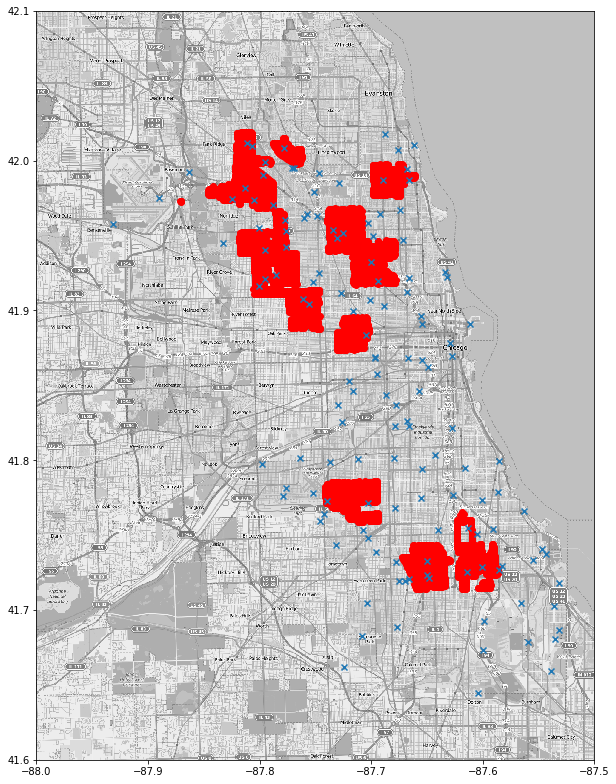

In [113]:

mapdata = np.loadtxt("west_nile/west_nile/input/mapdata_copyright_openstreetmap_contributors.txt")
traps = df[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

spray_df = spray_df[spray_df['Longitude']>-88]
locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
sprays = spray_df[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(sprays[:,0], sprays[:,1], c='r', alpha=1)
plt.scatter(locations[:,0], locations[:,1], marker='x')


In this plot, each x represents a trap location, and the red marks are areas sprayed.  
___

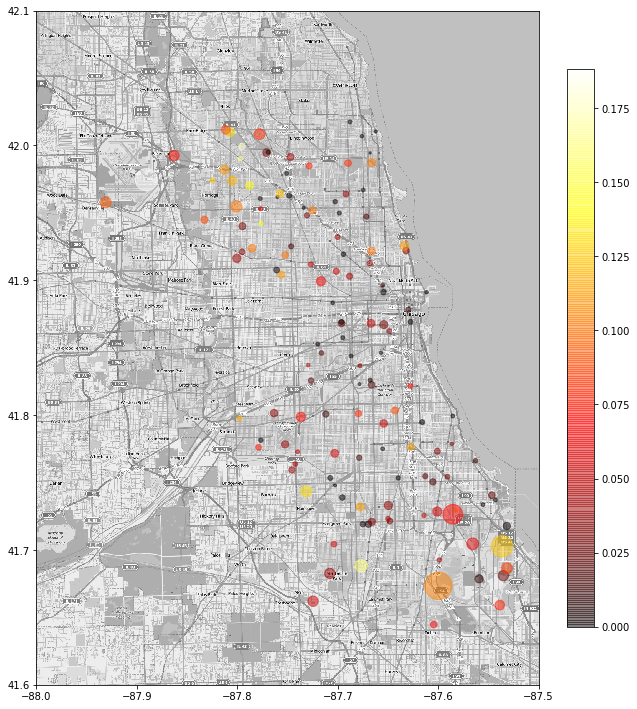

In [115]:
dfll = df.groupby(['Latitude', 'Longitude'],as_index=False).mean().copy()
traps = df[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
#plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.scatter(dfll['Longitude'], dfll['Latitude'], c=dfll.WnvPresent, s=5*dfll.NumMosquitos, 
            marker='o',alpha=0.5, cmap='hot')
plt.colorbar(fraction=0.05)

#plt.scatter(df['Longitude'], df['Latitude'], c=df.WnvPresent, marker='x',)

In this plot, each bubble represents a mosquito trap.  The size represents the total number of mosquitos caught by the trap, and the color represents the percentage of the time the trap caught mosquitos with West Nile Virus
___